# <img src="https://filoger.com/wp-content/uploads/2021/09/circle-logo-1536x1536.png" alt="keras" width="150" height="150">
<h1 align=center><font size = 7>Lab 10 : DT</font></h1>
<h1 align=center><font size = 4>Hands-On Machine Learning, 1401 | DeadLine: 15th Azar, 13:00 </font></h1>



# Part 01

# Decision Tree Classifier 

# 0. Import libraries

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import category_encoders
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


In [212]:
#pip install -U imbalanced-learn

# 1. Read data

In [213]:
path = 'Titanic.csv'
df = pd.read_csv(path, header=None)


# 2. Exploratory data analysis

In [214]:
df.shape

(892, 12)

In [215]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


In [216]:
col_names = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
df.columns = col_names
col_names

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [217]:
df.drop(['PassengerId'] , axis=1 , inplace=True) # , 'Name' , 'Ticket'

In [218]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


In [219]:
df.drop(index = 0 , axis=0 , inplace=True)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    object
 1   Pclass    891 non-null    object
 2   Name      891 non-null    object
 3   Sex       891 non-null    object
 4   Age       714 non-null    object
 5   SibSp     891 non-null    object
 6   Parch     891 non-null    object
 7   Ticket    891 non-null    object
 8   Fare      891 non-null    object
 9   Cabin     204 non-null    object
 10  Embarked  889 non-null    object
dtypes: object(11)
memory usage: 83.5+ KB


In [221]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

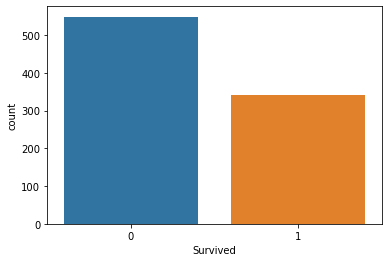

In [222]:
sns.countplot(data=df, x='Survived')

### Missing values

In [223]:
df.isnull().sum() # check missing values in variables

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [224]:
df.duplicated().sum()

0

In [225]:
def missing_percent(df):
    
    nan_percent = 100 * (df.isnull().sum() / len(df))
    nan_percent = nan_percent[nan_percent > 0].sort_values()
    
    return nan_percent

In [226]:
def missing_plot(df):
    
    nan_percent = missing_percent(df)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=nan_percent.index, y=nan_percent)

In [227]:
missing_percent(df)

Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

In [228]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NaN


In [229]:
df = df.dropna(axis=0, subset=['Embarked'])

In [230]:
missing_percent(df)

Age      19.910011
Cabin    77.277840
dtype: float64

In [231]:
df[df['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5,NaN,S
879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [232]:
df['Salutation'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())


In [233]:
grp = df.groupby(['Sex', 'Pclass'])


In [234]:
grp.Age.apply(lambda x: x.fillna(x.median()))
df.Age.fillna(df.Age.median, inplace = True)

In [235]:
missing_percent(df)

Cabin    77.27784
dtype: float64

In [236]:
df_Main = df 
df = df.drop(['Cabin'] , axis=1)


In [237]:
missing_percent(df)

Series([], dtype: float64)

In [238]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Salutation
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,S,Mr


# 3. X, y

In [194]:
X = df.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = df['Survived']
X.shape

(889, 8)

# 4. train test split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((711, 8), (178, 8))

# 5. Preprocessing

In [196]:
X_train.dtypes

Pclass        object
Sex           object
Age           object
SibSp         object
Parch         object
Fare          object
Embarked      object
Salutation    object
dtype: object

In [197]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Salutation'],
      dtype='object')

In [198]:
encoder = ce.OrdinalEncoder(cols=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Salutation'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
709,1,1,1,1,1,1,1,1
241,2,1,2,2,1,2,2,1
383,2,2,3,1,1,3,1,2
793,2,1,2,3,2,4,1,1
684,2,2,4,4,2,5,1,2


In [199]:
encoder2 = ce.OrdinalEncoder(cols=[ 'Survived'])
y_train = encoder2.fit_transform(y_train)
y_test = encoder2.transform(y_test)


In [200]:
def over_sampling(X, y):
    
    resampler = SMOTE(random_state=101)

    # Resampling the data
    X_resampled, y_resampled = resampler.fit_resample(X, y)

    # Resampled data
    
    return X_resampled, y_resampled

In [201]:
X_resampled_train, y_resampled_train = over_sampling(X_train, y_train)

In [202]:
X_resampled_test, y_resampled_test = over_sampling(X_test, y_test)

# 6. Decision Tree Classifier with criterion gini index

### Create

In [203]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3 , random_state=42)

clf_gini_resampled = DecisionTreeClassifier(criterion='gini', max_depth=3 , random_state=42)


### Train

In [204]:
clf_gini.fit(X_train, y_train)

clf_gini_resampled.fit(X_resampled_train, y_resampled_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [275]:
clf_gini.tree_.max_depth

3

### Test

In [205]:
y_pred_gini = clf_gini.predict(X_test)
y_resampled_pred_gini = clf_gini.predict(X_resampled_test)

In [206]:
accuracy_score(y_test, y_pred_gini)

0.7921348314606742

In [207]:
accuracy_score(y_resampled_test, y_resampled_pred_gini)

0.8256880733944955

In [42]:
y_pred_train = clf_gini.predict(X_train)
y_resampled_pred_train = clf_gini.predict(X_resampled_train)

In [43]:
accuracy_score(y_train, y_pred_train)  

0.8030942334739803

In [44]:
accuracy_score(y_resampled_train, y_resampled_pred_train)  

0.8295454545454546

In [45]:
accuracy_score(y_train, y_pred_train) - accuracy_score(y_test, y_pred_gini)

0.010959402013306141

In [46]:
accuracy_score(y_resampled_train, y_resampled_pred_train) - accuracy_score(y_resampled_test, y_resampled_pred_gini)

0.003857381150959127

### feature importances

In [47]:
clf_gini.feature_importances_

array([2.21740735e-01, 6.51751000e-01, 2.52042942e-04, 5.89717516e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.72844703e-02])

In [48]:
X.head()  # Sex , Age , Pclass 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
1,3,male,22,1,0,7.25,S,Mr
2,1,female,38,1,0,71.2833,C,Mrs
3,3,female,26,0,0,7.925,S,Miss
4,1,female,35,1,0,53.1,S,Mrs
5,3,male,35,0,0,8.05,S,Mr


### Visualize decision-tree

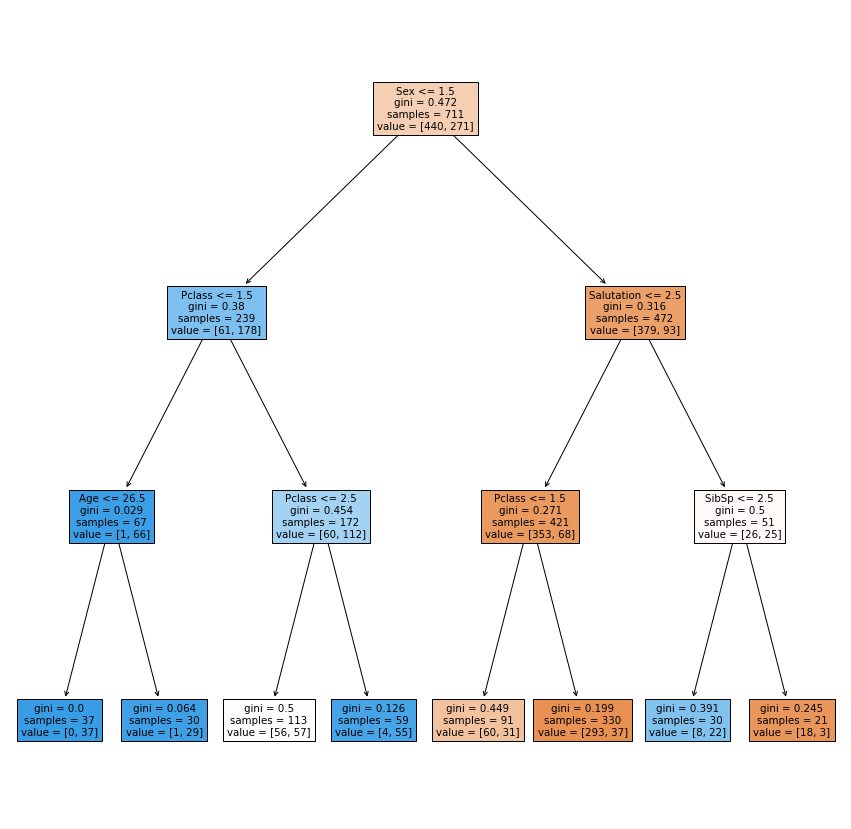

In [49]:
plt.figure(figsize=(15,15))
plot_tree(clf_gini, filled=True, feature_names=X.columns);

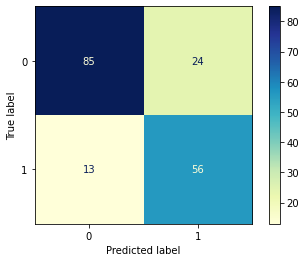

In [50]:
plot_confusion_matrix(clf_gini, X_test, y_test  ,  cmap='YlGnBu')

In [74]:
clf_gini.get_depth()

3

### Classification Report

In [51]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       109
           1       0.70      0.81      0.75        69

    accuracy                           0.79       178
   macro avg       0.78      0.80      0.79       178
weighted avg       0.80      0.79      0.79       178



# 7. Decision Tree Classifier with criterion entropy

### Create 

In [52]:
clf_ent = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)


### Train

In [53]:
clf_ent.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

### Test

In [54]:
y_pred_ent = clf_ent.predict(X_test) 


### Visualize decision-trees

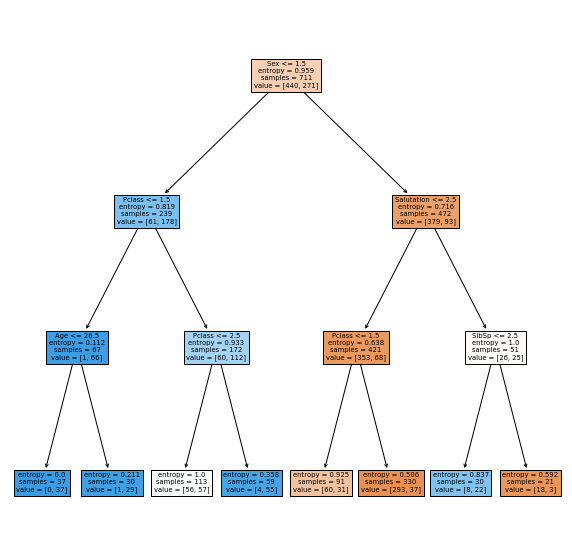

In [75]:
plt.figure(figsize=(10,10))
plot_tree(clf_ent, filled=True, feature_names=X.columns);

### Classification Report

In [56]:
print(classification_report(y_test, y_pred_ent))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       109
           1       0.70      0.81      0.75        69

    accuracy                           0.79       178
   macro avg       0.78      0.80      0.79       178
weighted avg       0.80      0.79      0.79       178



# 8. Pre-Pruning

In [69]:
Leaf = DecisionTreeClassifier(max_leaf_nodes= 8)
Leaf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=8)

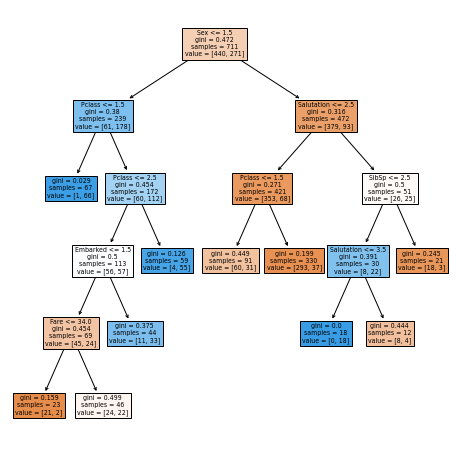

In [58]:
plt.figure(figsize=(8,8))
plot_tree(Leaf, filled=True, feature_names=X.columns);

### 8-2 .DecitionTree Without any param

In [70]:

model = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)

y_predicted = model.predict(X_test)


print('Training accuracy: ',model.score(X_train,y_train))

print('Test Accuracy: ',model.score(X_test,y_test))


Training accuracy:  0.9887482419127989
Test Accuracy:  0.7752808988764045


In [77]:
model.get_depth() , model.get_n_leaves() 

(21, 157)

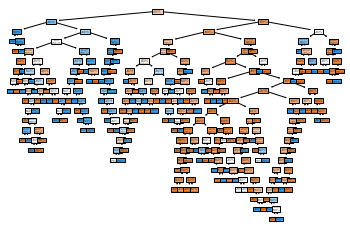

In [81]:
plot_tree(model, filled=True, feature_names=X.columns);

### 9.Challenge --> Post-Pruning

In [239]:
df_Main.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S,Mr


In [243]:
X1, y1 = df_Main[[ 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin','Embarked']],df_Main['Survived']
X1, y1 = X1.fillna(0), y1.fillna(0)


In [248]:
#X1 = pd.get_dummies(X1)
encodr = ce.OrdinalEncoder(cols=['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin','Embarked'])
X1 = encoder.fit_transform(X1)
 

In [250]:

encodr2 = ce.OrdinalEncoder(cols=['Survived' ])
y1 = encodr2.fit_transform(y1)


In [251]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=1)

In [252]:
model = DecisionTreeClassifier(random_state=1).fit(X_train1, y_train1)
y_predicted1 = model.predict(X_test1)
print('Training accuracy: ', model.score(X_train1, y_train1))
print('Test Accuracy: ', model.score(X_test1, y_test1))

Training accuracy:  0.9903536977491961
Test Accuracy:  0.7790262172284644


####  شده overfit از مقایسه داده های اموزشی و تست در بالا می بینیم که مدل 

In [274]:
path = DecisionTreeClassifier(random_state=1).cost_complexity_pruning_path(X_train1, y_train1)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
impurities

array([0.01186648, 0.0119239 , 0.0121566 , 0.01242455, 0.01296046,
       0.01363034, 0.01508494, 0.02103982, 0.02389798, 0.0277565 ,
       0.02872113, 0.03175793, 0.03489092, 0.03596273, 0.03703454,
       0.03917816, 0.04813905, 0.05071139, 0.05339092, 0.05874998,
       0.06418559, 0.06695832, 0.06977183, 0.07561807, 0.08017597,
       0.0832516 , 0.08485932, 0.08646703, 0.08995589, 0.09521751,
       0.10398687, 0.10943882, 0.11126015, 0.11677232, 0.12416546,
       0.1318825 , 0.13972365, 0.14169675, 0.14959029, 0.15575357,
       0.1600426 , 0.16223088, 0.16445906, 0.16927556, 0.17168713,
       0.17409871, 0.17963283, 0.1852673 , 0.18812546, 0.19404354,
       0.20897463, 0.21846781, 0.22168229, 0.23482316, 0.24147856,
       0.25376341, 0.26786619, 0.27757986, 0.28303826, 0.29019549,
       0.29851297, 0.31385088, 0.35010615, 0.47320127])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

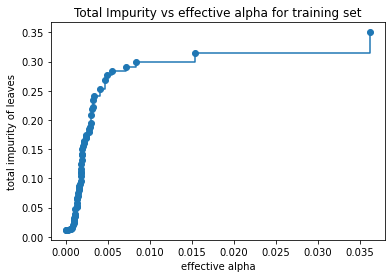

In [257]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [258]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train1, y_train1)
    clfs.append(clf)

In [259]:
print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12309512043734383 and a depth of: 0


In [260]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

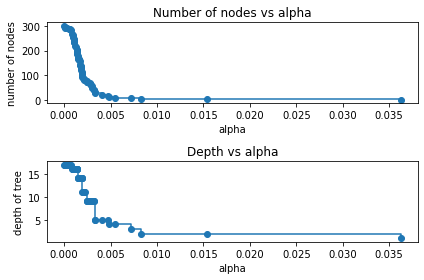

In [264]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

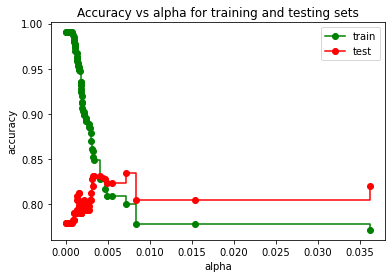

In [268]:
train_scores = [clf.score(X_train1, y_train1) for clf in clfs]
test_scores = [clf.score(X_test1, y_test1) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post" , c='g')
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post" , c='r')
ax.legend()
plt.show()

In [269]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train1, y_train1))
print('Test accuracy of best model: ',best_model.score(X_test1, y_test1))

Training accuracy of best model:  0.8006430868167203
Test accuracy of best model:  0.8352059925093633


In [281]:
best_model.tree_.max_depth , best_model.tree_.n_leaves , best_model.tree_.node_count

(3, 5, 9)

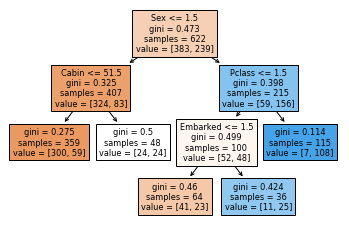

In [284]:
plot_tree(best_model, filled=True, feature_names=X1.columns);

# Part 02

# Random Forest

In [61]:
X.shape[1]

8

In [62]:
n_estimators = [64, 100, 128, 200]
max_features=[2, 3, 4 , 8]
bootstrap = [True, False]

In [63]:
param_grid = {'n_estimators':n_estimators, 'max_features':max_features, 'bootstrap':bootstrap}

In [64]:
RF = RandomForestClassifier()
grid = GridSearchCV(RF, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 8],
                         'n_estimators': [64, 100, 128, 200]})

In [65]:
grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 200}

In [66]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       109
           1       0.68      0.75      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178



In [67]:
RF_OOB = RandomForestClassifier(max_features=4, n_estimators=200, oob_score=True)
RF_OOB.fit(X_train, y_train)
RF_OOB.oob_score_  , (1 - RF_OOB.oob_score_)

(0.8213783403656821, 0.17862165963431786)

In [68]:
RF_OOB = RandomForestClassifier(max_features=4, n_estimators=200, oob_score=True)
RF_OOB.fit(X_train, y_train)
RF_OOB.oob_score_  , (1 - RF_OOB.oob_score_)

(0.810126582278481, 0.189873417721519)